# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


### Conor Fitzpatrick 

In [3]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

/Users/cfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/cfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/Users/cfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install emoji

     |████████████████████████████████| 433 kB 3.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [63]:
# Add any additional import statements you need here

import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
import re

In [23]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/cfitzpatrick/Downloads/M1 Results"


twitter_folder = os.path.join(data_location, "twitter/")
lyrics_folder = os.path.join(data_location, "lyrics/")

# # These subfolders should still work if you correctly stored the 
# # data from the Module 1 assignment
# twitter_folder = "twitter/"
# lyrics_folder = "lyrics/"

In [25]:
def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens, 
    number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
    and num_tokens most common tokens. Return a list with the number of tokens, number
    of unique tokens, lexical diversity, and number of characters. 
    """
# Function for the descriptive stats
def descriptive_stats(tokens_list, num_common=10):
    # Flatten the list of lists into a single list of tokens
    all_tokens = [token for sublist in tokens_list for token in sublist]
    
    # Calculate
    num_tokens = len(all_tokens)
    unique_tokens = set(all_tokens)
    num_unique_tokens = len(unique_tokens)
    num_characters = sum(len(token) for token in all_tokens)
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens else 0
    
    # Most common tokEns 
    most_common_tokens = Counter(all_tokens).most_common(num_common)
    
    # Print the statistics
    print(f"Number of tokens: {num_tokens}")
    print(f"Number of unique tokens: {num_unique_tokens}")
    print(f"Number of characters: {num_characters}")
    print(f"Lexical diversity: {lexical_diversity:.2f}")
    print(f"Most common tokens: {most_common_tokens}")
    
    # Return the statistics as a list
    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]


In [26]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 13 most common tokens are: [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1), ('with', 1), ('other', 1), ('in', 1), ('this', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are beneficial for a number of reasons including detecting errors and logical issues, which can signify a bug. They are great for helping you debug problems and better document everything you are doing. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [28]:
# Read in the lyrics data

import os

def load_lyrics_data(folder_path):
    lyrics_data = {}
    for artist_folder in os.listdir(folder_path):
        artist_path = os.path.join(folder_path, artist_folder)
        if os.path.isdir(artist_path):
            lyrics_data[artist_folder] = {}
            for file_name in os.listdir(artist_path):
                song_title = file_name.split('.')[0]
                with open(os.path.join(artist_path, file_name), 'r', encoding='utf-8') as file:
                    lyrics_data[artist_folder][song_title] = file.read()
    return lyrics_data

lyrics_folder = "/Users/cfitzpatrick/Downloads/M1 Results/lyrics/"
lyrics_data = load_lyrics_data(lyrics_folder)


In [ ]:
# Read in twitter data

In [95]:
# Take out the descriptions and store in a dict 
def extract_descriptions(folder_path, file_names):
    descriptions_dict = {}
    for file_name in file_names:
        artist = file_name.split('_')[0]  
        descriptions = []
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            next(file)  # Skip the header line
            for line in file:
                parts = line.strip().split('\t')
                if len(parts) > 6:  # Ensure there's a description field
                    descriptions.append(parts[6])
        descriptions_dict[artist] = descriptions
    return descriptions_dict

# location of the Twitter data folder and the specific files
twitter_folder = "/Users/cfitzpatrick/Downloads/M1 Results/twitter/"
file_names = ["cher_followers_data.txt", "robynkonichiwa_followers_data.txt"]

# Store ina dict
descriptions_dict = extract_descriptions(twitter_folder, file_names)

# Print the descriptions 
for artist, descriptions in descriptions_dict.items():
    print(f"Descriptions for {artist}:")
    for description in descriptions[:5]:  # Print the first 5 descriptions for inspection
        print(description)

Descriptions for cher:
𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
csu
Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com
I’m unemployed and live with my parents. MOOPS!
Descriptions for robynkonichiwa:
"I love chill" •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…
books, movies, music, nature & TV shows. OG Sweetee since '12 thanks to YouTube recommending 'This Feeling' on my homepage ♥️
(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)
This Twitter profile is full of sarcasm and rants with the occasional moan, dont like me dont follow me! KLF Stan Account Aspiring Youth Council rep
Flora Youssef - Blogger & Founder Posting review articles about the latest music 🎵 https://t.co/dx4hoIom7T https://t.co/KsplT6mZzs


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [96]:
import nltk
nltk.download('stopwords')

# Punctuation and stopwords to use
punctuation = set(string.punctuation)
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cfitzpatrick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
# Here we remove the punctuation
def remove_punctuation(text):
    return ''.join(char for char in text if char not in punctuation)

# split on whitespace to tokenize
def tokenize(text):
    return text.split()

# Eliminate stopwords
def remove_stop(tokens):
    return [token for token in tokens if token not in stop_words]

# Transformation pipeline
def transform(text):
    # Lowercase the entire text using casefold
    text = text.casefold()
    # Remove punctuation
    text = remove_punctuation(text)
    # Tokenize text using regex to split by word boundaries
    tokens = re.findall(r'\b\w+\b', text)
    # Remove stopwords
    tokens = remove_stop(tokens)
    return tokens

### Clean Twitter data

In [114]:
# Combine descriptions from both artists into a single list of dictionaries
combined_descriptions = []
for artist, descriptions in descriptions_dict.items():
    for description in descriptions:
        combined_descriptions.append({'artist': artist, 'description': description})

# Convert the combined descriptions to a DataFrame
descriptions_df = pd.DataFrame(combined_descriptions)

# Apply the cleaning function to the 'description' column using transform
descriptions_df['cleaned_description'] = descriptions_df['description'].apply(transform)


In [115]:
descriptions_df

,artist,description,cleaned_description
0,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]"
1,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[163, 愛かっぷ, 26歳, 工〇好きな女の子, フォローしてくれたらdmします]"
2,cher,csu,[csu]
3,cher,Writer @Washinformer @SpelmanCollege alumna #D...,"[writer, washinformer, spelmancollege, alumna,..."
4,cher,I’m unemployed and live with my parents. MOOPS!,"[unemployed, live, parents, moops]"
...,...,...,...
2191118,robynkonichiwa,"singer of songs, type 1 diabetic, tired $jakel...","[singer, songs, type, 1, diabetic, tired, jake..."
2191119,robynkonichiwa,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,"[dadx2, conarch, photographer, dk, stemgrønnes..."
2191120,robynkonichiwa,A year to change a life is still a year ✨😌,"[year, change, life, still, year]"
2191121,robynkonichiwa,Head of Consumer - Mango. Made in Melbourne. R...,"[head, consumer, mango, made, melbourne, rambl..."


### Clean Lyrics data

In [123]:
import re

# Transformation pipeline for lyrics
def transform(text):
    # Lowercase the entire text using casefold
    text = text.casefold()
    # Remove punctuation
    text = remove_punctuation(text)
    # Tokenize text using regex to split by word boundaries
    tokens = re.findall(r'\b\w+\b', text)
    # Remove stopwords
    tokens = remove_stop(tokens)
    return tokens

In [124]:
# Function to load lyrics data
def load_lyrics_data(folder_path):
    lyrics_data = {}
    for artist_folder in os.listdir(folder_path):
        artist_path = os.path.join(folder_path, artist_folder)
        if os.path.isdir(artist_path):
            lyrics_data[artist_folder] = {}
            for file_name in os.listdir(artist_path):
                song_title = file_name.split('.')[0]
                with open(os.path.join(artist_path, file_name), 'r', encoding='utf-8') as file:
                    lyrics_data[artist_folder][song_title] = file.read()
    return lyrics_data

#lyrics data location
lyrics_folder = "/Users/cfitzpatrick/Downloads/M1 Results/lyrics/"
lyrics_data = load_lyrics_data(lyrics_folder)

# Flatten the lyrics data into a DataFrame 
lyrics_list = []
for artist, songs in lyrics_data.items():
    for song, lyrics in songs.items():
        lyrics_list.append({'artist': artist, 'song': song, 'lyrics': lyrics})

lyrics_df = pd.DataFrame(lyrics_list)

# Clean the lyrics column
lyrics_df['cleaned_lyrics'] = lyrics_df['lyrics'].apply(transform)

# Print the cleaned lyrics for inspection
print(lyrics_df[['artist', 'song', 'cleaned_lyrics']])


    artist                    song  \
0    robyn      robyn_includemeout   
1    robyn          robyn_electric   
2    robyn         robyn_beach2k20   
3    robyn         robyn_lovekills   
4    robyn       robyn_timemachine   
..     ...                     ...   
415   cher  cher_takeitfromtheboys   
416   cher          cher_dreambaby   
417   cher   cher_pleasedonttellme   
418   cher     cher_ihopeyoufindit   
419   cher       cher_classified1a   

                                        cleaned_lyrics  
0    [include, really, simple, single, pulse, repea...  
1    [electric, electric, electric, natural, high, ...  
2    [beach, 2k20, wanna, go, gonna, get, ok, call,...  
3    [love, kills, youre, looking, love, get, heart...  
4    [time, machine, hey, cant, believe, fit, threw...  
..                                                 ...  
415  [take, boys, scared, never, hard, keep, good, ...  
416  [dream, baby, found, boy, hes, dream, baby, do...  
417  [please, dont, tell, ya, 

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [126]:
# descriptive statistics function
def descriptive_stats(tokens_list, num_common=10):
    # Flatten the list of lists into a single list of tokens
    all_tokens = [token for sublist in tokens_list for token in sublist]
    
    # Calculate the stats we want
    num_tokens = len(all_tokens)
    unique_tokens = set(all_tokens)
    num_unique_tokens = len(unique_tokens)
    num_characters = sum(len(token) for token in all_tokens)
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens else 0
    
    # Get the most common tokens
    most_common_tokens = Counter(all_tokens).most_common(num_common)
    
    # Print the statistics
    print(f"Number of tokens: {num_tokens}")
    print(f"Number of unique tokens: {num_unique_tokens}")
    print(f"Number of characters: {num_characters}")
    print(f"Lexical diversity: {lexical_diversity:.2f}")
    print(f"Most common tokens: {most_common_tokens}")
    
    # Return the statistics as a list
    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]


### For Twitter

In [127]:

# Call descriptive_stats for the cleaned Twitter descriptions
for artist in descriptions_df['artist'].unique():
    artist_descriptions = descriptions_df[descriptions_df['artist'] == artist]['cleaned_description'].tolist()
    print(f"Twitter Data ({artist}) Descriptive Stats:")
    twitter_stats = descriptive_stats(artist_descriptions)
    print(twitter_stats)


Twitter Data (cher) Descriptive Stats:
Number of tokens: 15327345
Number of unique tokens: 1224069
Number of characters: 90934128
Lexical diversity: 0.08
Most common tokens: [('love', 217449), ('im', 139831), ('️', 131875), ('life', 126418), ('music', 90024), ('de', 73084), ('follow', 63246), ('lover', 62278), ('like', 58737), ('mom', 55405)]
[15327345, 1224069, 0.07986177645247758, 90934128]
Twitter Data (robynkonichiwa) Descriptive Stats:
Number of tokens: 1466362
Number of unique tokens: 229673
Number of characters: 8984097
Lexical diversity: 0.16
Most common tokens: [('music', 15345), ('love', 11820), ('️', 9804), ('im', 9096), ('och', 7923), ('life', 7555), ('de', 6395), ('follow', 5650), ('like', 4956), ('lover', 4877)]
[1466362, 229673, 0.1566277631307958, 8984097]


### For Lyrics

In [128]:

# Call descriptive_stats for the cleaned lyrics data
for artist in lyrics_df['artist'].unique():
    artist_lyrics = lyrics_df[lyrics_df['artist'] == artist]['cleaned_lyrics'].tolist()
    print(f"Lyrics Data ({artist}) Descriptive Stats:")
    lyrics_stats = descriptive_stats(artist_lyrics)
    print(lyrics_stats)

Lyrics Data (robyn) Descriptive Stats:
Number of tokens: 15276
Number of unique tokens: 2167
Number of characters: 73665
Lexical diversity: 0.14
Most common tokens: [('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 252), ('like', 232), ('baby', 222), ('youre', 169), ('never', 155), ('dance', 150)]
[15276, 2167, 0.14185650693898927, 73665]
Lyrics Data (cher) Descriptive Stats:
Number of tokens: 35921
Number of unique tokens: 3703
Number of characters: 172588
Lexical diversity: 0.10
Most common tokens: [('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333), ('time', 319), ('baby', 319), ('see', 308), ('oh', 306), ('one', 282)]
[35921, 3703, 0.10308733053088723, 172588]


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: I am sure if we included all the stop words, the top five words would probably be stop words like a, an, the, but, etc. These are so common in language that they would surely be the most prevelant. This would not give us much insight into the lyrics.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I have to say, I am very unfamiliar with both Cher and Robyn, I am not sure I could name a song of either one. But it is interesting that Robyn tends to have a higher lyrical diversity. They are both pop singers, but obviously Cher is a bit more famous, maybe her songs tend to be simpler and less complex? 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [6]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [129]:
# Your code here

import emoji
from collections import Counter

# Extract the emojis from text
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

# Ten most common
def most_common_emojis(descriptions_df, num_common=10):
    common_emojis = {}
    for artist in descriptions_df['artist'].unique():
        artist_descriptions = descriptions_df[descriptions_df['artist'] == artist]['description']
        all_emojis = [emoji for desc in artist_descriptions for emoji in extract_emojis(desc)]
        common_emojis[artist] = Counter(all_emojis).most_common(num_common)
    return common_emojis

# Get the ten most common emojis by artist
common_emojis = most_common_emojis(descriptions_df)

# Print the ten most common emojis by artist
for artist, emojis in common_emojis.items():
    print(f"Most common emojis for {artist}: {emojis}")


Most common emojis for cher: [('❤', 79223), ('🌈', 47549), ('♥', 33978), ('🏳', 33412), ('✨', 29468), ('💙', 21379), ('🏻', 20930), ('🌊', 20223), ('✌', 16773), ('💜', 16550)]
Most common emojis for robynkonichiwa: [('❤', 4783), ('🌈', 4685), ('🏳', 3528), ('♥', 3103), ('✨', 2223), ('🏻', 1495), ('✌', 1189), ('🏼', 1139), ('♀', 836), ('💙', 809)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [130]:
# Your code here

# Get hashtags from the text
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

# Ten most common hashtags
def most_common_hashtags(descriptions_df, num_common=10):
    common_hashtags = {}
    for artist in descriptions_df['artist'].unique():
        artist_descriptions = descriptions_df[descriptions_df['artist'] == artist]['description']
        all_hashtags = [hashtag for desc in artist_descriptions for hashtag in extract_hashtags(desc)]
        common_hashtags[artist] = Counter(all_hashtags).most_common(num_common)
    return common_hashtags

# Get the ten most common hashtags by artist
common_hashtags = most_common_hashtags(descriptions_df)

# Print the ten most common hashtags by artist
for artist, hashtags in common_hashtags.items():
    print(f"Most common hashtags for {artist}: {hashtags}")


Most common hashtags for cher: [('#BLM', 9535), ('#Resist', 6036), ('#BlackLivesMatter', 4681), ('#resist', 3797), ('#FBR', 3239), ('#TheResistance', 2995), ('#blacklivesmatter', 2645), ('#1', 2627), ('#Resistance', 1919), ('#RESIST', 1823)]
Most common hashtags for robynkonichiwa: [('#BlackLivesMatter', 337), ('#BLM', 306), ('#blacklivesmatter', 208), ('#1', 199), ('#music', 174), ('#Music', 113), ('#EDM', 86), ('#LGBTQ', 75), ('#TeamFollowBack', 59), ('#blm', 56)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [136]:
# Get song titles from the first line of lyrics
def extract_song_titles(lyrics_data):
    song_titles = {}
    for artist, songs in lyrics_data.items():
        titles = []
        for song, lyrics in songs.items():
            first_line = lyrics.split('\n')[0].strip()
            titles.append(first_line)
        song_titles[artist] = titles
    return song_titles

# Extract song titles from the lyrics data
song_titles = extract_song_titles(lyrics_data)

# Print 
for artist, titles in song_titles.items():
    print(f"Song titles for {artist}: {titles[:5]}")  # Print the first 5 titles for inspection


Song titles for robyn: ['"Include Me Out"', '"Electric"', '"Beach 2K20"', '"Love Kills"', '"Time Machine"']
Song titles for cher: ['"Come And Stay With Me"', '"Pirate"', '"Stars"', '"These Days"', '"Love So High"']


In [137]:
# extract words from text
def extract_words(text):
    return re.findall(r'\b\w+\b', text.casefold())

# Five most common words in the song titles
def most_common_words_in_titles(song_titles, num_common=5):
    common_words = {}
    for artist, titles in song_titles.items():
        all_words = [word for title in titles for word in extract_words(title)]
        common_words[artist] = Counter(all_words).most_common(num_common)
    return common_words

# Get the five most common words in song titles by artist
common_words_in_titles = most_common_words_in_titles(song_titles)

# Print them out
for artist, words in common_words_in_titles.items():
    print(f"Most common words in song titles for {artist}: {words}")


Most common words in song titles for robyn: [('me', 11), ('you', 9), ('the', 8), ('my', 8), ('love', 6)]
Most common words in song titles for cher: [('the', 54), ('you', 44), ('love', 38), ('i', 38), ('to', 28)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.125;0.775x0.755)
Artist 2    Axes(0.125,0.125;0.775x0.755)
Name: length, dtype: object

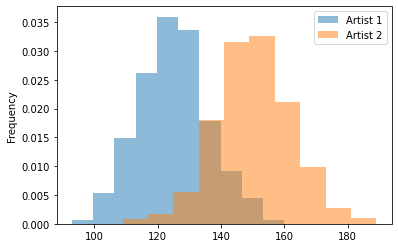

In [132]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: \s+ matches whitespace characters, which can be spaces, tabs, newlines etc.  



In [141]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

  artist                song  length
0  robyn  robyn_includemeout     453
1  robyn      robyn_electric     253
2  robyn     robyn_beach2k20     291
3  robyn     robyn_lovekills     413
4  robyn   robyn_timemachine     233


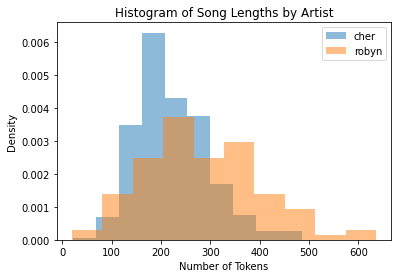

In [143]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Compile a regex pattern for collapsing whitespace
collapse_whitespace = re.compile(r'\s+')

# Function to tokenize lyrics by collapsing whitespace and splitting
def tokenize_lyrics(lyric):
    """Strip and split on whitespace"""
    return [item.lower() for item in collapse_whitespace.split(lyric.strip())]


# Calculate song lengths in terms of number of tokens using the `tokenize_lyrics` function
lyrics_df['length'] = lyrics_df['lyrics'].apply(lambda x: len(tokenize_lyrics(x)))

# Print the song lengths DataFrame for inspection
print(lyrics_df[['artist', 'song', 'length']].head())

# Plot histogram of song lengths by artist
lyrics_df.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)
plt.xlabel('Number of Tokens')
plt.ylabel('Density')
plt.title('Histogram of Song Lengths by Artist')
plt.show()

